<a href="https://colab.research.google.com/github/Renator12/DATA-SCIENCE-PROJECTS-TMU/blob/main/ImbalancedCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score ,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"

# Define column names (from dataset documentation)
column_names = [
    "class", "age", "menopause", "tumor_size", "inv_nodes",
    "node_caps", "deg_malig", "breast", "breast_quad", "irradiat"
]

# Read the CSV file into a pandas DataFrame
cancer_data= pd.read_csv(url, header=None, names=column_names)
cancer_data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
cancer_data.dropna(inplace=True) #dropping empty columns
cancer_data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


**IMBALANCED DATASET ->Recurrence-event count a lot lower than no-recurrence**

In [ ]:
#classes
cancer_data['class'].value_counts() #not balanced.way more no-recurrence events

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

(array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

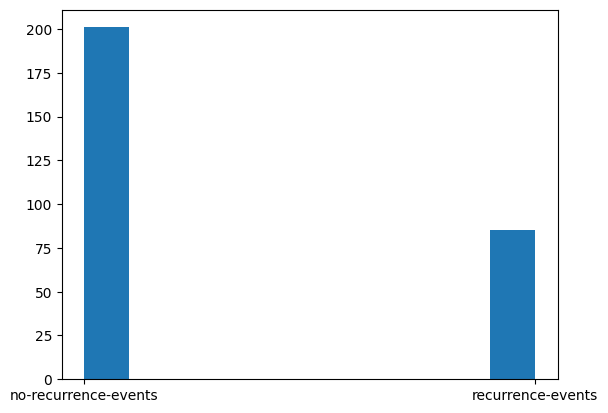

In [ ]:
plt.hist(cancer_data['class']) #histogram of class types

**DATA PREPROCESSESING-->ORDINAL ENCODING(CATEGORICAL VARIABLES SEEM TO HAVE AN INHERENT ORDERING SO ORDINAL WAS THE LOGICAL CHOICE).Converting Class column to be the dependent variable and everything else to be independent**

In [ ]:
#data preprocessing.Using ordinal encoding  for age,tumor_size,inv-nodese,etc
ordencoder=OrdinalEncoder()
ord_encoded_data=ordencoder.fit_transform(cancer_data)
X=ord_encoded_data[:,1:]
Y=ord_encoded_data[:,0]

In [ ]:
X.shape #checking shape

(286, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33) #train-test split

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5) #decision tree classifier from scikitlearn fitting to training data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

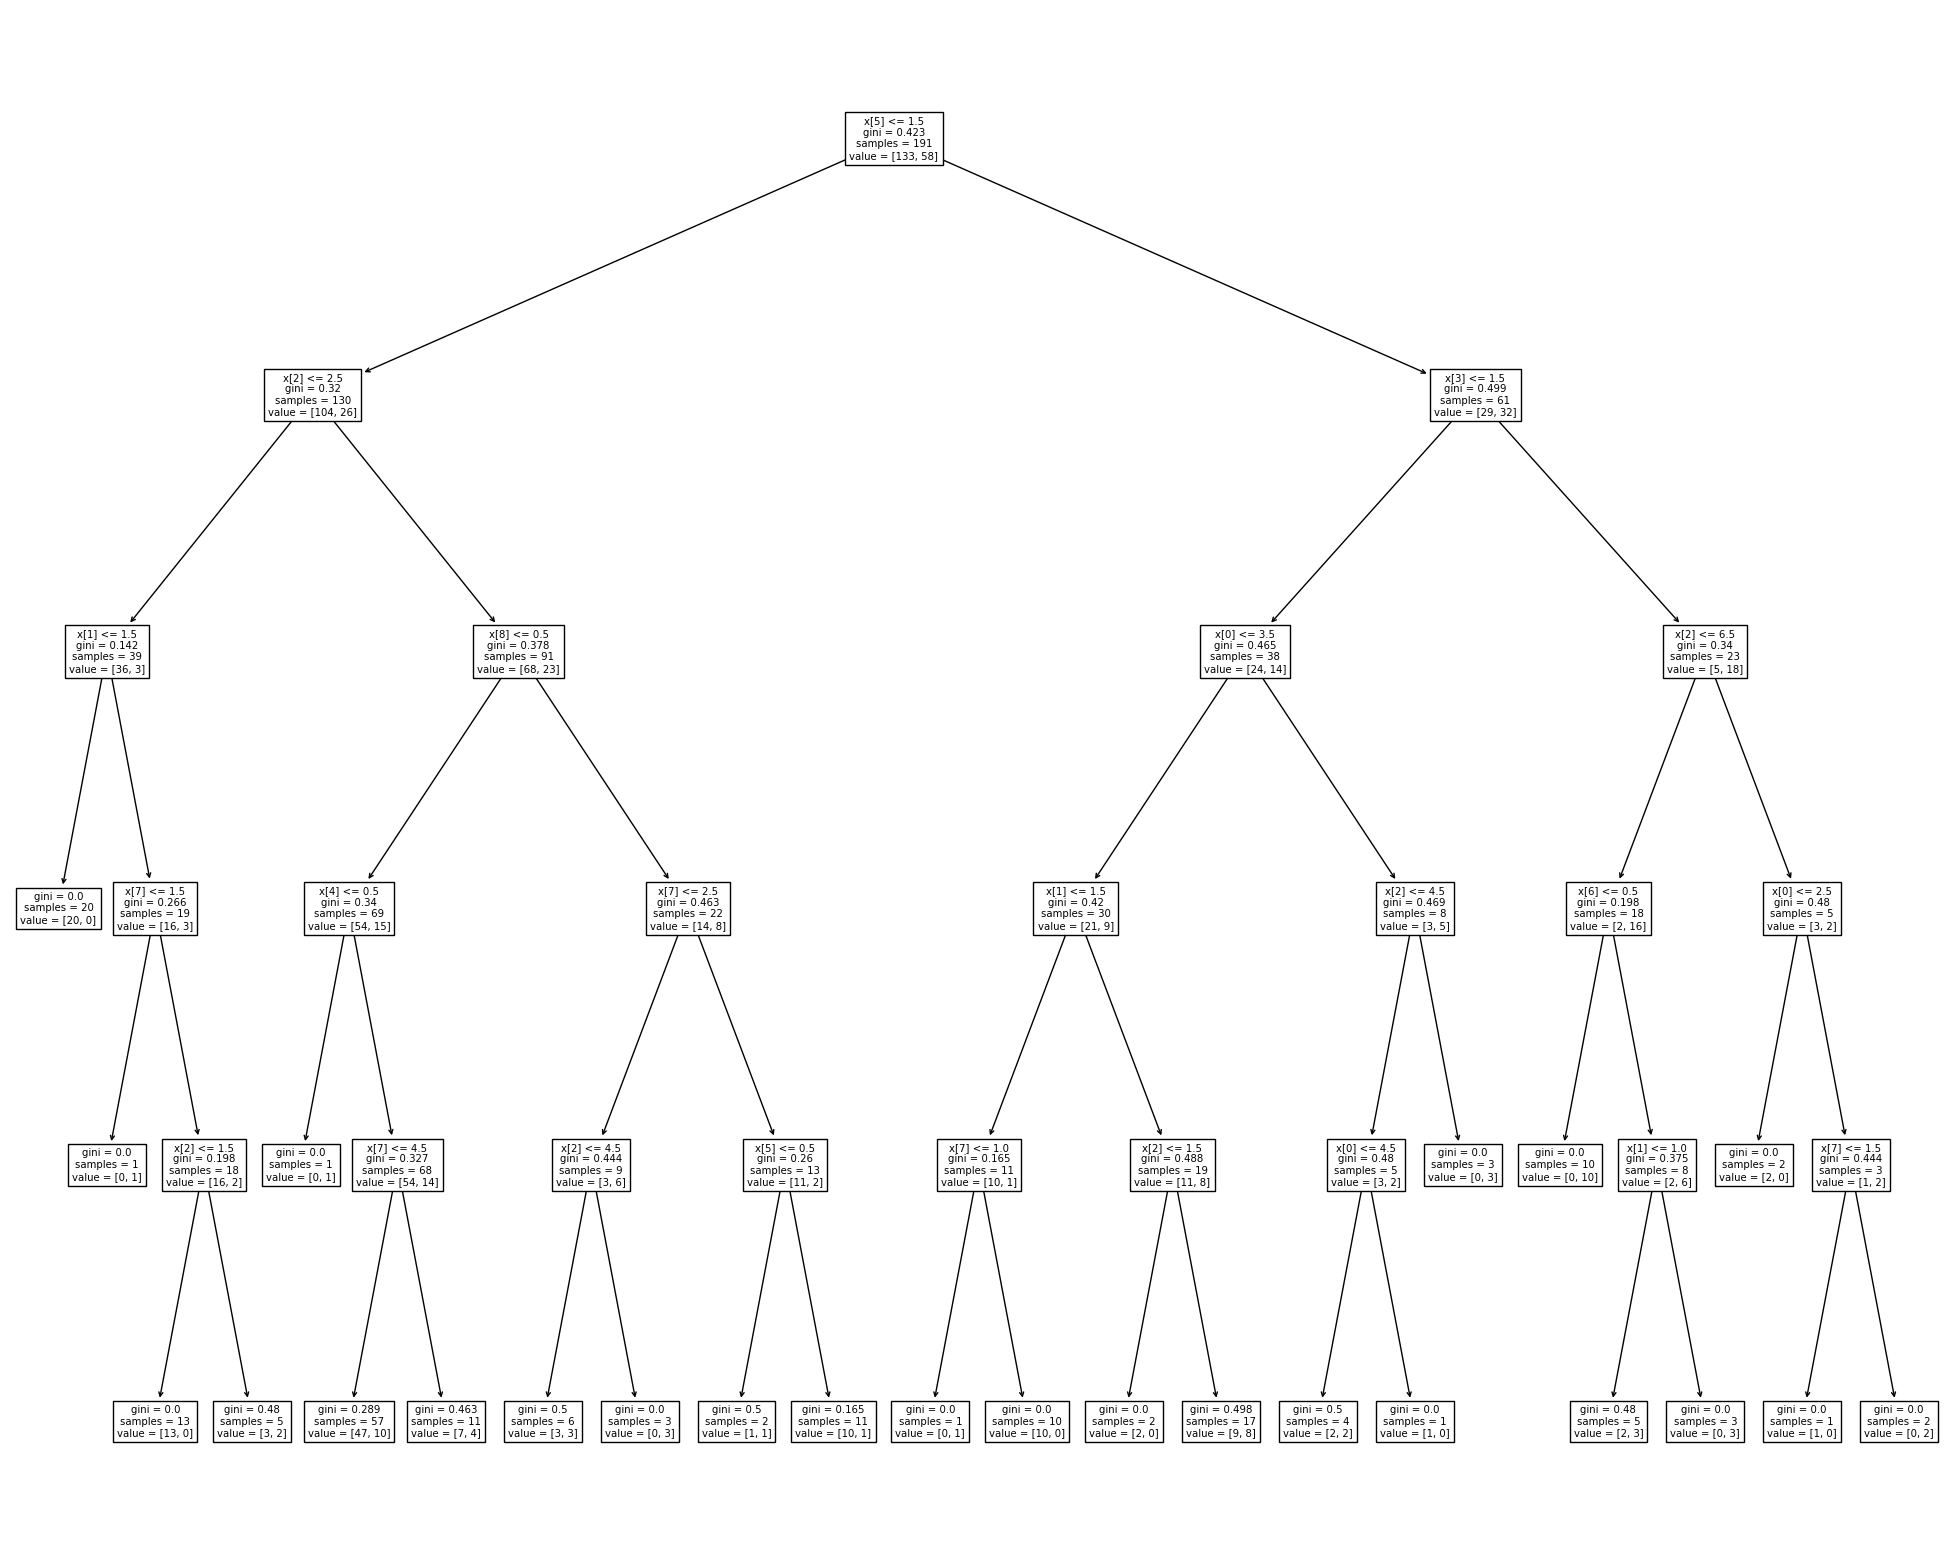

In [ ]:

fig = plt.figure(figsize=(25,20)) #visualization decision tree
_ = tree.plot_tree(clf)

In [ ]:
y_test.shape

(95,)

In [ ]:
y_test_predictions=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_predictions)

array([[57, 11],
       [19,  8]])

In [ ]:
accuracy_score(y_test,y_test_predictions) #68% accuracy for decision tree accuracy

0.6842105263157895

In [ ]:
precision_score(y_test,y_test_predictions) #precision_score for decision tree

0.42105263157894735

In [ ]:
recall_score(y_test,y_test_predictions)#recall for decision tre

0.2962962962962963

In [ ]:
f1_score(y_test,y_test_predictions) #f1 score decision tree

0.34782608695652173

In [ ]:
rclf= RandomForestClassifier(max_depth=5) #initializing randomforest
rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
rclf_preds=rclf.predict(X_test)

In [ ]:
confusion_matrix(y_test,rclf_preds)

array([[57, 11],
       [17, 10]])

In [ ]:
accuracy_score(y_test,rclf_preds) #70.5% accuracy an improvement from decision tree

0.7052631578947368

In [ ]:
precision_score(y_test,rclf_preds) #43.4% accuracy

0.47619047619047616

In [ ]:
recall_score(y_test,rclf_preds) #37% recall

0.37037037037037035

In [ ]:
f1_score(y_test,rclf_preds) #f1 score for random forest

0.4166666666666667

The random forest classifier has a 2% higher accuracy while also boasting a nearly 5% higher precision score than the decision tree model.The random forest also boasts a F1-score 7% higher and hence is the better model

In [ ]:
smote = SMOTE() #using smote to resample
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled)


DecisionTreeClassifier(max_depth=5)

In [ ]:
smote_decision_tree_preds=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,smote_decision_tree_preds) #confusion matrix for smote decision tree

array([[56, 12],
       [17, 10]])

In [ ]:
accuracy_score(y_test,smote_decision_tree_preds) #69% accuracy ->a 1% improvement in predictions for decision tree

0.6947368421052632

In [ ]:
rclf.fit(X_resampled,y_resampled) #random forest smote intiialization

RandomForestClassifier(max_depth=5)

In [ ]:
smote_randomforest_preds=rclf.predict(X_test) #predictions for smote on random forest

In [ ]:
confusion_matrix(y_test,smote_randomforest_preds)   #confusion matrix

array([[55, 13],
       [17, 10]])

In [ ]:
accuracy_score(y_test,smote_randomforest_preds) #did not have a massive impact on  random forest model.A 1% decrease infact

0.6842105263157895

**A new effort to improve our results->A BALANCED RANDOMFOREST CLASSIFIER->perform data resampling on the bootstrap sample in order to explicitly change the class distribution.**

In [ ]:
balancedrandorest = clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=1, random_state=0,
    bootstrap=False)

In [ ]:
balancedrandorest.fit(X_train, y_train)


BalancedRandomForestClassifier(bootstrap=False, max_depth=1, random_state=0,
                               replacement=True, sampling_strategy='all')

In [ ]:
balanced_rand_preds=balancedrandorest.predict(X_test) #balanced random forest predictions->

In [ ]:
accuracy_score(y_test,balanced_rand_preds) #get the highest accuracy score out of all classifiers so far

0.7473684210526316

In [ ]:
f1_score(y_test,balanced_rand_preds)  #get the highest f1 score out of all classifier so far

0.6129032258064516

My results show that the balanced random forest classifier gives the best resuls as far as accuracy_score and f1_score.As for the decision tree and random-forest models,the decision tree model implementing SMOTE shows an improvement in accuracy.The random forest model seems to be working well even without implementing SMOTE because the sci-kit learn classifier naturally assigns different weights to classes.My final conclusions are
1)Decision trees are a lot more sensitive to imbalanced datasets than random forests.If working with imbalanced datasets,use random forests ,balanced random forests or atleast implement SMOTE.